# BNP Paribas Cardif Claims Management
https://www.kaggle.com/c/bnp-paribas-cardif-claims-management

In [124]:
%matplotlib inline
import requests, zipfile, urllib.request
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

In [129]:
display(pd.get_option("display.max_columns"))
pd.options.display.max_columns = 133
pd.options.display.max_info_columns = 133
pd.options.display.
display(pd.get_option("display.max_columns"))
# pd.reset_option("display.max_columns") # reset option

20

133

In [88]:
# url = "https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/download/sample_submission.csv.zip"

# response = requests.get(url)

# path = "/Users/jianglongli/Desktop/GA/portfolio/data/"
# name = "sample_submission.zip"
# zip_file = path + name

# with open(zip_file, "wb") as f:
#     f.write(response.content)

# # with open("data/sample_submission.zip", "rb") as f:
# #     z = zipfile.ZipFile(f)
# #     original_csv_filename = z.namelist()[0] # get name of first csv in zip file
# #     unzipped_csv_filepath = z.extract(original_csv_filename, data_folder) # extract csv file
# #     os.rename(unzipped_csv_filepath, csv_filepath) # normalize csv name


In [93]:
# # zip download question
# import requests, zipfile

# url = "https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data/download/train.csv.zip"
# # url = 'http://www.blog.pythonlibrary.org/wp-content/uploads/2012/06/wxDbViewer.zip'
# response = requests.get(url)

# with open("code.zip", "wb") as f:
#     f.write(response.content)
# zipfile.is_zipfile('code.zip')

In [101]:
df = pd.read_csv('data/train.csv')

In [130]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [103]:
df.shape

(114321, 133)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 133 columns):
ID        114321 non-null int64
target    114321 non-null int64
v1        64489 non-null float64
v2        64525 non-null float64
v3        110864 non-null object
v4        64525 non-null float64
v5        65697 non-null float64
v6        64489 non-null float64
v7        64489 non-null float64
v8        65702 non-null float64
v9        64470 non-null float64
v10       114237 non-null float64
v11       64485 non-null float64
v12       114235 non-null float64
v13       64489 non-null float64
v14       114317 non-null float64
v15       64485 non-null float64
v16       64426 non-null float64
v17       64525 non-null float64
v18       64489 non-null float64
v19       64478 non-null float64
v20       64481 non-null float64
v21       113710 non-null float64
v22       113821 non-null object
v23       63646 non-null float64
v24       114321 non-null object
v25       65702 non-null flo

In [105]:
df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [131]:
df.columns

Index(['ID', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=133)

In [133]:
df.target.describe()

count    114321.000000
mean          0.761199
std           0.426353
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

In [134]:
df.target.value_counts()

1    87021
0    27300
Name: target, dtype: int64

# feature engineering

In [150]:
df.dtypes.value_counts()

float64    108
object      19
int64        6
dtype: int64

In [192]:
col_obj = df.dtypes[df.dtypes == 'object'].index
col_float = df.dtypes[df.dtypes == 'float64'].index
col_int = df.dtypes[df.dtypes == 'int64'].index

col_target = ['ID', 'target']

df_obj = df[col_target + list(col_obj)]
df_float = df[col_target + list(col_float)]
df_int = df[col_int] 

In [198]:
# IDs are unique
len(df.ID.unique())

114321

In [177]:
dfmean = df.groupby('target').mean()
dfmean

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,114238.340330,1.646081,7.274653,4.024702,8.662844,2.404222,2.449455,1.552248,9.074359,1.513185,15.431097,6.791044,3.850430,11.757420,2.122566,4.953639,3.672782,0.836764,0.225571,17.715960,6.900479,1.322128,1.739897,1.847052,2.701353,5.154235,8.154097,1.654021,2.241382,6.059693,8.129107,13.543942,0.761814,0.026484,1.143700,10.641711,7.164595,12.926804,2.183818,10.622761,9.245782,1.680687,12.751557,8.020449,1.000375,7.414326,15.698931,1.274597,1.626078,4.045488,8.089941,10.476235,1.683780,14.405471,1.147179,1.741110,6.118338,15.715861,9.274642,17.650753,9.489424,12.285609,1.307875,2.484791,2.295766,7.293370,13.360768,2.262910,7.410530,6.077667,2.258217,1.673937,2.948878,1.235621,10.013713,1.843293,1.545020,0.970601,0.586452,5.326564,3.867992,0.674651,6.411988,7.587082,7.573806,1.224101,11.698573,6.656684,2.859165,5.334283,2.678133,1.099793,11.510692,2.100095,3.979347,3.471806,13.220859,10.508835,2.263580,8.216087,8.349334,3.603819,1.290933,2.843268,6.812207,3.805043,0.944664,1.672184,3.199696,1.966429,0.134212,2.028243,1.684638
1,114225.975489,1.625671,7.526222,4.184315,8.768369,2.446883,2.495146,1.478357,9.018015,1.999184,15.452727,6.909647,3.781449,12.199962,2.067343,4.913315,3.884222,0.842440,0.221235,17.792365,7.070429,1.018368,1.684468,1.885469,2.757167,5.073490,8.223457,1.611770,2.135658,6.515044,8.120198,13.320531,0.734845,0.111146,1.267632,10.410736,7.188400,12.924366,2.227273,10.851329,9.108504,1.614119,12.468466,8.015276,1.662493,7.127639,15.715327,1.247073,1.537889,4.088361,7.575185,10.624333,1.724233,14.640874,0.994151,1.669737,6.417126,15.890454,9.291390,17.535899,9.436277,12.264841,1.470634,2.416534,2.440655,7.311924,13.325920,2.192368,7.246823,6.251106,2.146315,1.586465,2.780941,1.215156,10.234673,1.950530,1.509727,0.965711,0.581036,5.523591,3.847962,0.662861,6.472923,7.634107,7.698308,1.259391,12.219642,6.934731,2.900405,5.284480,2.631329,1.074914,11.882784,2.169801,4.247339,3.330628,13.685374,10.560824,2.300219,8.332567,8.369640,3.027104,1.291311,2.703175,6.825772,3.466716,0.911684,1.672812,3.252520,2.051290,0.365337,1.892386,1.757223


In [213]:
df_obj.head()

,ID,target,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,3,1,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,4,1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,5,1,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,6,1,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,8,1,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


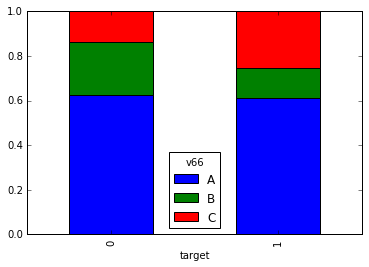

In [221]:
def crosstab(var):
    ct = pd.crosstab(df_obj.target, df[var])
    ct.div(ct.sum(1), 0).plot(kind = "bar", stacked=True)
    
crosstab('v66')

In [180]:
dfmean.iloc[0]

ID      114238.340330
v1           1.646081
v2           7.274653
v4           4.024702
v5           8.662844
v6           2.404222
v7           2.449455
v8           1.552248
v9           9.074359
v10          1.513185
v11         15.431097
v12          6.791044
v13          3.850430
v14         11.757420
v15          2.122566
v16          4.953639
v17          3.672782
v18          0.836764
v19          0.225571
v20         17.715960
v21          6.900479
v23          1.322128
v25          1.739897
v26          1.847052
v27          2.701353
v28          5.154235
v29          8.154097
v32          1.654021
v33          2.241382
v34          6.059693
            ...      
v97          7.587082
v98          7.573806
v99          1.224101
v100        11.698573
v101         6.656684
v102         2.859165
v103         5.334283
v104         2.678133
v105         1.099793
v106        11.510692
v108         2.100095
v109         3.979347
v111         3.471806
v114        13.220859
v115      

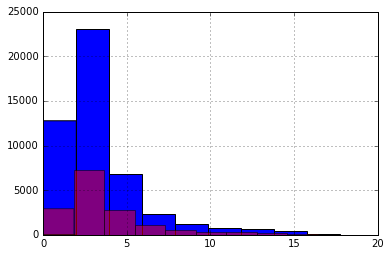

In [179]:
df[df.target == 1].v123.hist(color = 'blue')
df[df.target == 0].v123.hist(color = 'red', alpha = 0.5)

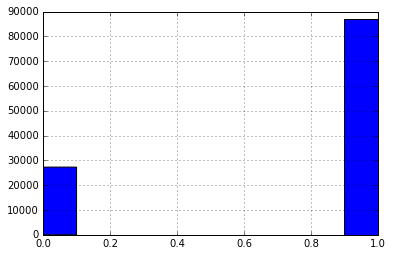

In [165]:
df.target.hist()